<a href="https://www.kaggle.com/code/shyamverma4447/customer-segmentation?scriptVersionId=247569395" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Customer Segmentation with K-Means

In this project, we use mall customer data to perform customer segmentation using K-Means clustering. This analysis helps identify customer groups based on spending behavior and income.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 1. Exploratory Data Analysis (EDA)

Before applying clustering, we perform initial data exploration to understand distributions and relationships between key features.


### Summary Statistics

We examine key statistical properties of the dataset including income and spending score.



### Gender Distribution

We visualize the distribution of customers by gender.


### Spending Score vs Annual Income

This scatter plot shows the relationship between a customer's annual income and spending score, colored by gender.


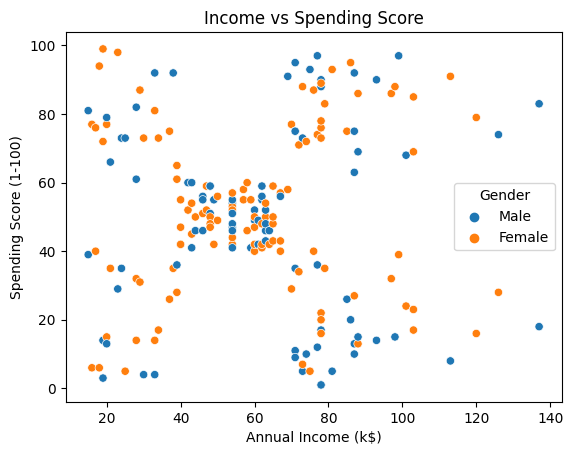

In [3]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Income vs Spending Score")
plt.show()

## 2. Data Preprocessing

Before applying clustering, we prepare the data by:
- Dropping irrelevant columns (e.g., `CustomerID`)
- Encoding categorical variables (e.g., Gender)
- Scaling numerical features to standardize the data


# Drop the CustomerID column
df_clean = df.drop('CustomerID', axis=1)


### Encoding Categorical Variables

We convert the categorical 'Gender' column to numeric format using one-hot encoding.


### Feature Scaling

K-Means is a distance-based algorithm, so we scale the features using StandardScaler to ensure equal weight.


In [4]:
df_clean = df.drop('CustomerID', axis=1)
df_clean = pd.get_dummies(df_clean, drop_first=True)  # Gender encoded
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

## 3. Choosing the Number of Clusters

We use the Elbow Method to determine the optimal number of clusters for K-Means. This method involves:
- Fitting K-Means with different values of `k`
- Calculating the **Within-Cluster Sum of Squares (WCSS)** for each `k`
- Plotting `k` vs. WCSS to find the "elbow" point, which suggests the best `k`


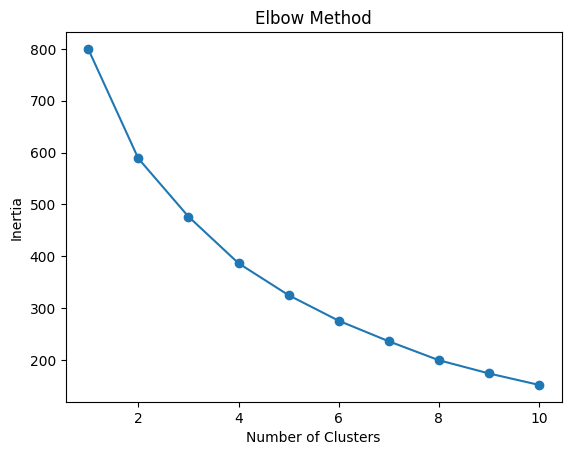

In [5]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## 4. K-Means Clustering

Using the optimal number of clusters (e.g., `k = 5`) identified through the Elbow Method, we fit the K-Means model and assign cluster labels to each customer.


In [6]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## 5. Visualizing Clusters

We use scatter plots to visualize how customers are grouped into clusters based on their annual income and spending score. This helps interpret the characteristics of each customer segment.


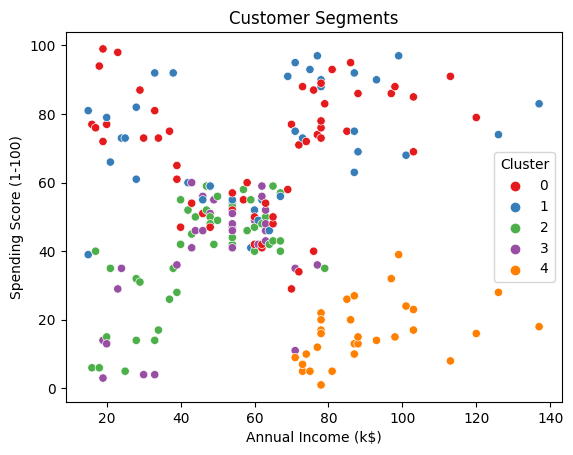

In [7]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.show()

## 6. Business Insight

### Cluster Characteristics

- **Cluster 0**: [Describe here, e.g., medium income, medium spending, mostly male/female if applicable]
- **Cluster 1**: [High income, high spending score — potential VIP customers]
- **Cluster 2**: [Low income, low spending — budget-conscious segment]
- **Cluster 3**: [Young customers with moderate income and spending]
- **Cluster 4**: [Other distinct behavior pattern]

### Marketing Priority

I would prioritize **Cluster 1 (High income, high spenders)** for premium product campaigns because they have the highest spending potential.

### Recommended Actions

- **For high spenders**: Offer loyalty programs, exclusive deals, and premium products.
- **For low spenders**: Design budget-friendly offers or discounts to increase engagement.
- **For other clusters**: Tailor communication based on their income and spending profile to improve conversion.


## Optional Enhancements

- Implement **Hierarchical Clustering** for comparison with K-Means.



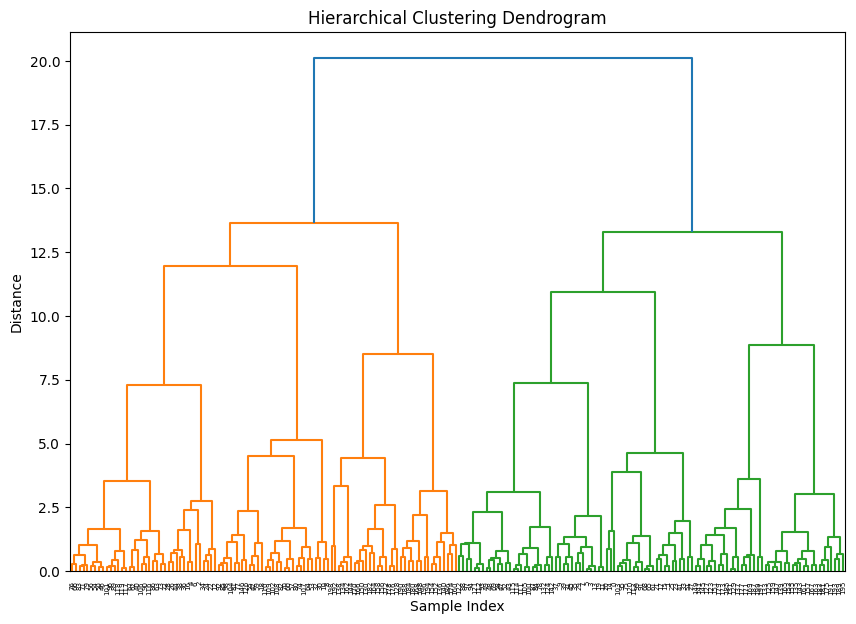

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use the scaled data
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


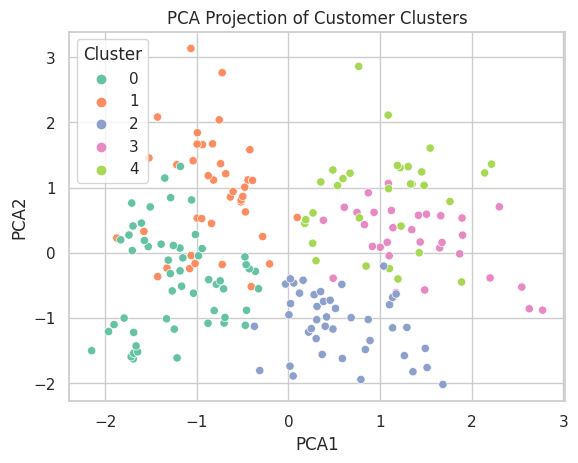

In [9]:
# 1. Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
 
# 2. Load the dataset using the correct Kaggle path
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
 
# 3. Drop 'CustomerID' and encode 'Gender'
df_clean = df.drop("CustomerID", axis=1)
df_clean = pd.get_dummies(df_clean, drop_first=True)  # Converts 'Gender' into binary column (e.g., Gender_Male)
 
# 4. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)
 
# 5. Apply KMeans Clustering (using k=5 as an example)
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
 
# 6. Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
 
# 7. Add PCA results back to the dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
 
# 8. Plot PCA-based cluster visualization
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('PCA Projection of Customer Clusters')
plt.show()

7. Hierarchical Clustering (for Comparison)
 
Hierarchical clustering provides a tree-like structure (dendrogram) that helps visualize how data points can be grouped based on similarity—without needing to predefine the number of clusters.
 
  Code:
python
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
 
Dendrogram to visualize merging of clusters
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
 
Apply Agglomerative Clustering with 5 clusters (for fair comparison)
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df['HC_Cluster'] = hc.fit_predict(X_scaled)